## Unsupervised learning Intro

photo here - diagram?

Why do we need them

- Data visualization

- Dimension Reduction - Data Processing

- Clustering

__Comparison with Supervised Learning__

- No obvious goals

- No universally agreed mechanism for assessment

## PCA

finds a low-dimensional represen- tation of a data set that contains as much as possible of the variation

Two different approach for the same process

- find the directions that captures most within the dataset

- These directions also define lines and subspaces that are as close as possible to the data cloud. 

-- When faced with a large set of corre- lated variables, principal components allow us to summarize this set with a smaller number of representative variables that collectively explain most of the variability in the original set.


<center> <h3> What are the Principal Directions </h3> </center>

<img src= "img/first_principal_component.png" style="height:100px">

__Notation__ $\phi_{11}, \cdots, \phi_{p1}$ are called loadings and $\phi_{1} = (\phi_{11}, \cdots, \phi_{p1})^{\intercal}$ is called _the first principal component_ 

Q: How do we find $\phi_{1}$ given a dataset $X = [X_{1}, \cdots, X_{p}]$?

__Remark__ We will assume that the data is centralized: that is to say $\bar{X_{i}} = \frac{1}{n}\sum_{j=1}^{n}x_{ij} = 0$

A: $$ z_{i1} = \phi_{11}x_{i1} + \cdots + \phi_{p1}x_{ip}$$  with a condition

$$\sum_{i = 1}^{p} \phi_{j1}^{2} = 1$$

Then the problem becomes

<img src= "img/optimization_problem.png" style="height:100px">


or equivalently:

$$ \max_{\phi_{11}, \cdots, \phi_{p1}}\frac{1}{n} \sum_{i = 1}^{n} z_{i1}^{2} \qquad  \text{subject to} \quad \sum_{j=1}^{p} \phi_{j1}^{2}=1$$

## Please!! PCA requires scaling!!!

- supervised: the training over labeled data. get a pattern based on the data to do predictions. 
    - advantage: clear target of why.  
    - classification: logistic, SVM, random forest
    - regression: linear, SVM, random forest
- unsupervised: no target to work with.
    - challenge: not clear about what to do. no one single target to work with. 
    - need to do preprocessing of the data: PCA will process the data first to understand what is really important at first, called dimension reduction, then, can do supervised training
    - PCA, give the data, find a better way to explain x. how to choose x? eigenvalue and eigenvector
        - project variance to the line (90 degree). capture the line that capture the most variance
        - first thing for PCA, standardize the data, find the pseudo line that pass the origin, so that the pseudo line won't be parallel to the first projected line. 
        - centralize data: subtract the mean, carry the data to origin
        - to get projection on pseudo line, x1.u.cos0 = d, u = 1. distance: uT.Xi
        - Why scaling? variance is scale dependent, capture variance
- reinforcement learning

# Centralize the Data

In [19]:
import numpy as np

In [20]:
x1 = np.random.normal(loc=8, scale=2.0, size=100)
x2 = np.random.normal(loc=2, scale=1.0, size=100)

In [21]:
import matplotlib.pyplot as plt

(-4, 8)

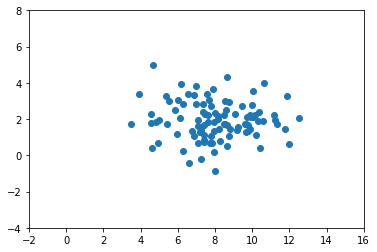

In [22]:
plt.scatter(x1,x2,)
plt.xlim((-2,16))
plt.ylim((-4,8))

In [23]:
x1_mean = x1.mean()
x2_mean = x2.mean()

In [24]:
x1_central = x1 - x1_mean
x2_central = x2 - x2_mean

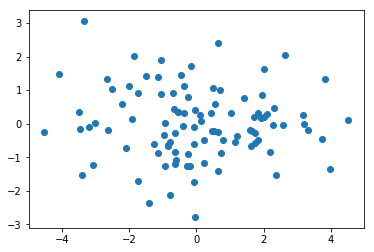

In [25]:
plt.scatter(x1_central,x2_central)

### Some Experiments on Scaling Data

In [26]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer

from sklearn.preprocessing import MinMaxScaler

In [36]:
binomial = np.random.binomial(1, 0.2, 100)

In [37]:
binomial

np.unique(binomial, return_counts= True)

(array([0, 1]), array([80, 20]))

In [38]:
binomial.mean()

0.2

In [39]:
print(np.std(binomial), np.var(binomial) )

0.4 0.16000000000000003


(array([80.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 20.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

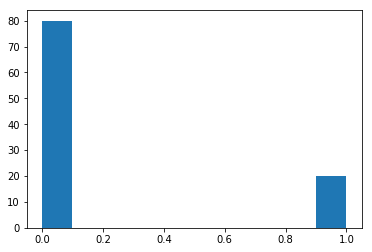

In [40]:
plt.hist(binomial)

In [41]:
std_scaler = StandardScaler()

In [42]:
s_binomial = std_scaler.fit_transform(binomial.reshape(-1,1))

/Users/yl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/yl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [44]:
s_binomial.mean()

0.0

In [45]:
np.var(s_binomial)

1.0

1.0


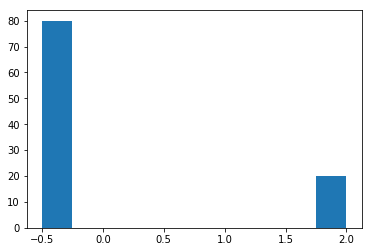

In [48]:
plt.hist(s_binomial)
print(np.std(s_binomial))

standarscaler just change the mean and var

In [52]:
chi_squared = np.random.chisquare(4, size = 100)

(array([31., 33., 22.,  3.,  6.,  2.,  2.,  0.,  0.,  1.]),
 array([ 0.23082429,  2.14544055,  4.0600568 ,  5.97467305,  7.8892893 ,
         9.80390555, 11.7185218 , 13.63313805, 15.5477543 , 17.46237055,
        19.3769868 ]),
 <a list of 10 Patch objects>)

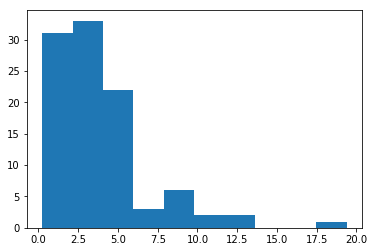

In [53]:
plt.hist(chi_squared)

In [54]:
ss = StandardScaler()

s_chi_squared = ss.fit_transform(chi_squared.reshape(-1,1))

(array([31., 33., 22.,  3.,  6.,  2.,  2.,  0.,  0.,  1.]),
 array([-1.20331158, -0.57141854,  0.0604745 ,  0.69236755,  1.32426059,
         1.95615363,  2.58804668,  3.21993972,  3.85183276,  4.48372581,
         5.11561885]),
 <a list of 10 Patch objects>)

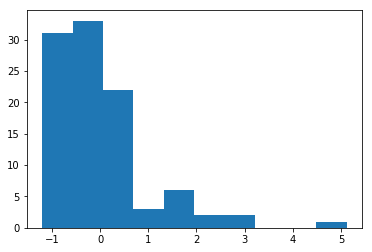

In [55]:
plt.hist(s_chi_squared)

In [43]:
print(np.var(s_chi_squared), np.mean(s_chi_squared))

1.0 -1.1102230246251565e-16


# standardscaler doesn't change distribution, just change mean and variance

# minmax cannot change variance, it just change the data into 0 to 1, don't do this to PCA

will this be the same thing for logistic regression?

In [44]:
mm = MinMaxScaler()

8.94104280375437 4.296656992377416


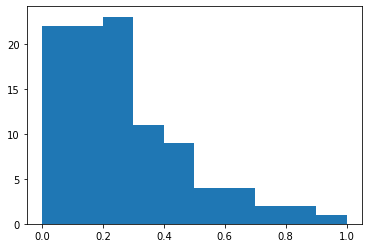

In [48]:
mm_chi = mm.fit_transform(chi_squared.reshape(-1,1))

plt.hist(mm_chi)

print(np.var(chi_squared), np.mean(chi_squared))